In [1]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
from plotnine import *
import re
from matplotlib import rc, font_manager  #한글출력
# 지도 표현을 위해
import folium


In [13]:
rc('font', family = 'AppleGothic')  # 한글출력

In [4]:
park = pd.read_csv('datas/전국도시공원표준데이터.csv', encoding = 'euc-kr')

In [5]:
park.shape

(16096, 20)

In [6]:
park.head(10)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,NaN,NaN,NaN,NaN,NaN,1990-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,NaN,NaN,NaN,NaN,NaN,1991-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
5,29170-00006,일곡제3근린공원,근린공원,광주광역시 북구 양일로 297,광주광역시 북구 일곡동 848-3,35.202593,126.896230,14313.6,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
6,29170-00007,첨단2주거1호근린공원,근린공원,광주광역시 북구 첨단연신로107번길 26,광주광역시 북구 신용동 680,35.207793,126.861396,34505.3,NaN,NaN,NaN,NaN,NaN,2006-12-05,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
7,29170-00008,첨단2산업2호근린공원,근린공원,광주광역시 북구 연제동 1020,광주광역시 북구 연제동 1020,35.201448,126.863643,48063.4,NaN,NaN,NaN,NaN,NaN,2006-12-05,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
8,29170-00009,첨단2주거3호근린공원,근린공원,광주광역시 북구 신용동 649,광주광역시 북구 신용동 649,35.212364,126.857536,22483.2,NaN,NaN,NaN,NaN,NaN,2006-12-05,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
9,29170-00010,우산근린공원,근린공원,광주광역시 북구 동문대로 141,광주광역시 북구 우산동 228-1,35.175626,126.926311,133120.0,NaN,NaN,NaN,NaN,NaN,1975-02-18,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN


In [7]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 20 columns):
관리번호            16096 non-null object
공원명             16096 non-null object
공원구분            16096 non-null object
소재지도로명주소        8321 non-null object
소재지지번주소         15213 non-null object
위도              16096 non-null float64
경도              16096 non-null float64
공원면적            16096 non-null float64
공원보유시설(운동시설)    4164 non-null object
공원보유시설(유희시설)    6085 non-null object
공원보유시설(편익시설)    4344 non-null object
공원보유시설(교양시설)    914 non-null object
공원보유시설(기타시설)    2503 non-null object
지정고시일           13512 non-null object
관리기관명           15381 non-null object
전화번호            14966 non-null object
데이터기준일자         16096 non-null object
제공기관코드          16096 non-null object
제공기관명           16096 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.5+ MB


In [8]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         7775
소재지지번주소           883
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    11932
공원보유시설(유희시설)    10011
공원보유시설(편익시설)    11752
공원보유시설(교양시설)    15182
공원보유시설(기타시설)    13593
지정고시일            2584
관리기관명             715
전화번호             1130
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     16096
dtype: int64

In [9]:
import missingno as msno

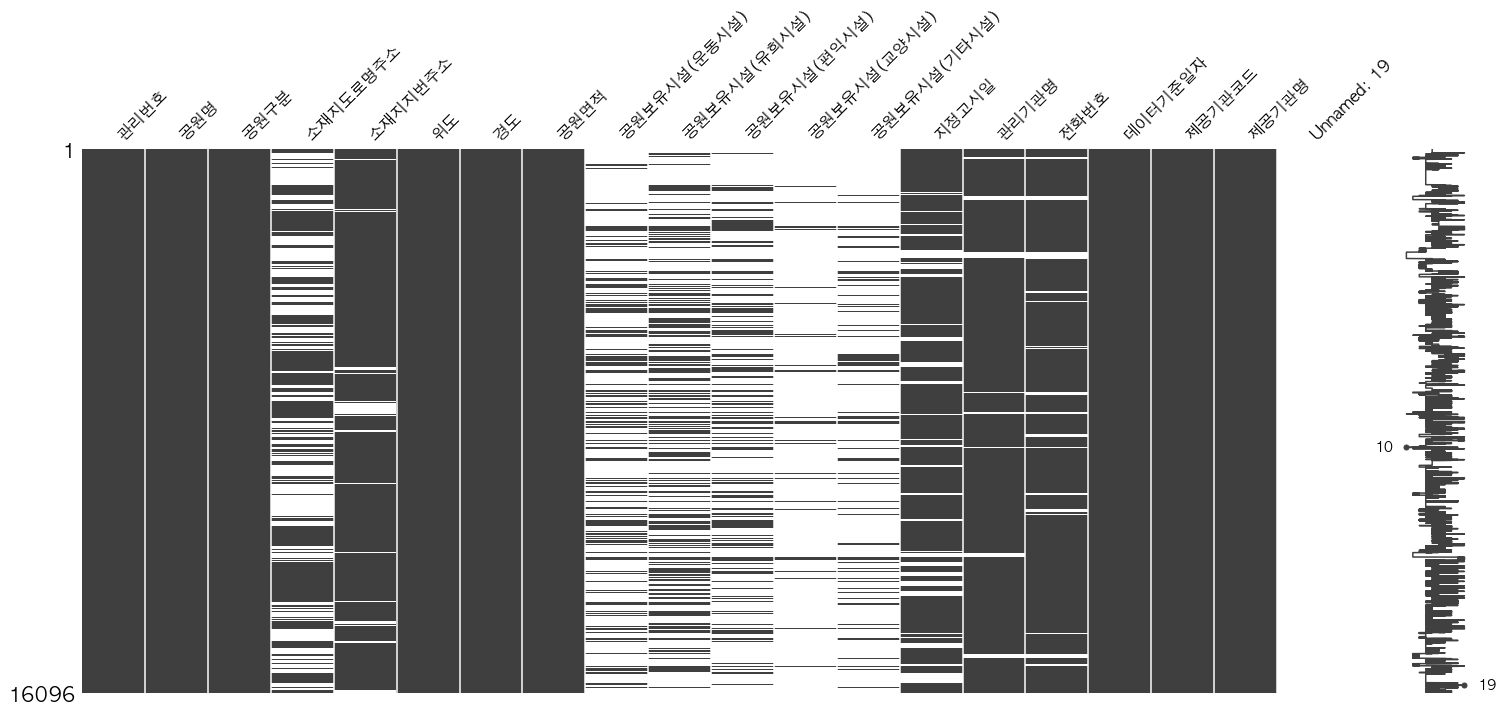

In [14]:
msno.matrix(park)